In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
def load_labeled_spam_dataset():
    """Load labeled spam dataset."""

    # Path where csv files are located
    base_path = "./data/"

    # List of csv files with full path
    csv_files = [os.path.join(base_path, csv) for csv in os.listdir(base_path)]

    # List of dataframes for each file
    dfs = [pd.read_csv(filename) for filename in csv_files]

    # Concatenate dataframes into a single one
    df = pd.concat(dfs)

    # Rename columns
    df = df.rename(columns={"CONTENT": "text", "CLASS": "label"})

    # Set a seed for the order of rows
    df = df.sample(frac=1, random_state=824)
    
    return df.reset_index()


# Save the dataframe into the df_labeled variable
df_labeled = load_labeled_spam_dataset()

In [12]:
# Take a look at the first 5 rows
df_labeled.head()

,index,COMMENT_ID,AUTHOR,DATE,text,label
0,86,z12uzb3oxy23cbikz23qsjczaxz5wh1t5,luisel Tutoriales Gameplays (luisel Tutoriales),2015-05-23T18:56:07.484000,music yeah﻿,0
1,291,z122z5pa2wyofbjj304cgfwrrmvjgn0pohc,Mia Aspinall,2014-11-08T10:30:35,"2 billion views, only 2 million shares﻿",0
2,142,z13bttm5gxecfvrqq04cevkpuxj5s1u5ys40k,Vane Cavazos,2014-09-20T15:39:44,Katycat! https://m.facebook.com/profile.php?id...,1
3,147,z132zl1rupqcylbep23jgfig3um3ct5vv,KatyPerry TheQueenOfPop,2014-09-22T06:50:24,--&gt;ATTENTION KATYCATS! Katy leads with 7 no...,1
4,326,z12usr54ppaxxf1dl23nhbybruapdnixw04,Arthur Teixeira,2014-11-12T20:12:47,I wanted to know the name of the guy that danc...,0


Value counts for each class:

1    1005
0     951
Name: label, dtype: int64



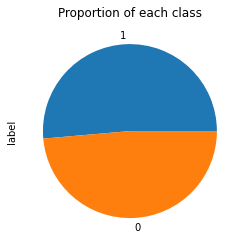

In [13]:
# Print actual value count
print(f"Value counts for each class:\n\n{df_labeled.label.value_counts()}\n")

# Display pie chart to visually check the proportion
df_labeled.label.value_counts().plot.pie(y='label', title='Proportion of each class')
plt.show()

In [14]:
# Drop unused columns
df_labeled = df_labeled.drop(['index', 'COMMENT_ID', 'AUTHOR', 'DATE'], axis=1)

# Look at the cleaned dataset
df_labeled.head()

,text,label
0,music yeah﻿,0
1,"2 billion views, only 2 million shares﻿",0
2,Katycat! https://m.facebook.com/profile.php?id...,1
3,--&gt;ATTENTION KATYCATS! Katy leads with 7 no...,1
4,I wanted to know the name of the guy that danc...,0


In [15]:
from sklearn.model_selection import train_test_split

# Save the text into the X variable
X = df_labeled.drop("label", axis=1)

# Save the true labels into the y variable
y = df_labeled["label"]

# Use 1/5 of the data for testing later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print number of comments for each set
print(f"There are {X_train.shape[0]} comments for training.")
print(f"There are {X_test.shape[0]} comments for testing")

There are 1564 comments for training.
There are 392 comments for testing


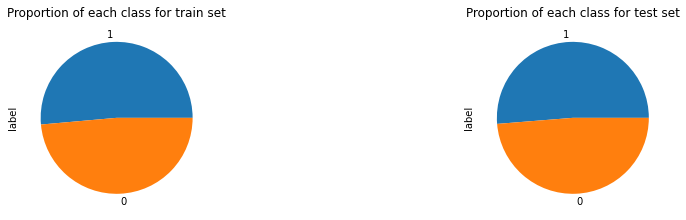

In [16]:
plt.subplot(1, 3, 1)
y_train.value_counts().plot.pie(y='label', title='Proportion of each class for train set', figsize=(10, 6))

plt.subplot(1, 3, 3)
y_test.value_counts().plot.pie(y='label', title='Proportion of each class for test set', figsize=(10, 6))

plt.tight_layout()
plt.show()

## Data Labeling 

### Establishing performance lower and upper bounds for reference
 establish a baseline for model accuracy


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Allow unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1, 5))

Now that the text encoding is defined, you need to select a model to make predictions. For simplicity you will use a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) classifier. This model is well suited for text classification and is fairly quick to train.

Let's define a function which will handle the model fitting and print out the accuracy on the test data:

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB


def calculate_accuracy(X_tr, y_tr, X_te=X_test, y_te=y_test, 
                       clf=MultinomialNB(), vectorizer=vectorizer):
    
    # Encode train text
    X_train_vect = vectorizer.fit_transform(X_tr.text.tolist())
    
    # Fit model
    clf.fit(X=X_train_vect, y=y_tr)
    
    # Vectorize test text
    X_test_vect = vectorizer.transform(X_te.text.tolist())
    
    # Make predictions for the test set
    preds = clf.predict(X_test_vect)
    
    # Return accuracy score
    return accuracy_score(preds, y_te)


In [19]:
# Empty dictionary
accs = dict()

### Random Labeling



In [20]:
# Calculate random labels
rnd_labels = np.random.randint(0, 2, X_train.shape[0])

# Feed them alongside X_train to calculate_accuracy function
rnd_acc = calculate_accuracy(X_train, rnd_labels)

rnd_acc

0.5892857142857143

In [28]:
# Empty list to save accuracies
rnd_accs = []

for _ in range(10):
    # Add every accuracy to the list
    rnd_accs.append(calculate_accuracy(X_train, np.random.randint(0, 2, X_train.shape[0])))

# Save result in accs dictionary
accs['random-labels'] = sum(rnd_accs)/len(rnd_accs)

# Print result
print(f"The random labelling method achieved and accuracy of {accs['random-labels']*100:.2f}%")

The random labelling method achieved and accuracy of 51.56%


In [29]:
# Calculate accuracy when using the true labels
true_acc = calculate_accuracy(X_train, y_train)

# Save the result
accs['true-labels'] = true_acc

print(f"The true labelling method achieved and accuracy of {accs['true-labels']*100:.2f}%")

The true labelling method achieved and accuracy of 91.58%


## Automatic labeling - Trying out different labeling strategies

### First iteration - Define some rules


- `free` - spam comments usually lure users by promoting free stuff
- `subs` - spam comments tend to ask users to subscribe to some website or channel
- `http` - spam comments include links very frequently

In [30]:
def labeling_rules_1(x):
    
    # Convert text to lowercase
    x = x.lower()
    
    # Define list of rules
    rules = [
        "free" in x,
        "subs" in x,
        "http" in x
    ]
    
    # If the comment falls under any of the rules classify as SPAM
    if any(rules):
        return 1
    
    # Otherwise, NO_LABEL
    return -1

In [37]:
# Apply the rules the comments in the train set
labels = [labeling_rules_1(label) for label in X_train.text]

# Convert to a numpy array
labels = np.asarray(labels)

# Take a look at the automatic labels
labels

array([-1, -1, -1, ..., -1, -1,  1])

In [38]:
# Create the automatic labeled version of X_train by removing points with NO_LABEL label
X_train_al = X_train[labels != -1]

# Remove predictions with NO_LABEL label
labels_al = labels[labels != -1]

print(f"Predictions with concrete label have shape: {labels_al.shape}")

print(f"Proportion of data points kept: {labels_al.shape[0]/labels.shape[0]*100:.2f}%")

Predictions with concrete label have shape: (379,)
Proportion of data points kept: 24.23%


In [39]:
# Compute accuracy when using these labels
iter_1_acc = calculate_accuracy(X_train_al, labels_al)

# Display accuracy
print(f"First iteration of automatic labeling has an accuracy of {iter_1_acc*100:.2f}%")

# Save the result
accs['first-iteration'] = iter_1_acc

First iteration of automatic labeling has an accuracy of 51.28%


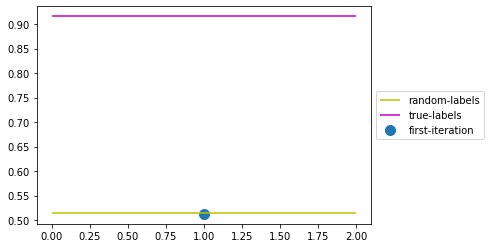

In [40]:
def plot_accuracies(accs=accs):
    colors = list("rgbcmy")
    items_num = len(accs)
    cont = 1

    for x, y in accs.items():
        if x in ['true-labels', 'random-labels', 'true-labels-best-clf']:
            plt.hlines(y, 0, (items_num-2)*2, colors=colors.pop())
        else:
            plt.scatter(cont, y, s=100)
            cont+=2
    plt.legend(accs.keys(), loc="center left",bbox_to_anchor=(1, 0.5))
    plt.show()
    
plot_accuracies()

In [41]:
def label_given_rules(df, rules_function, name, 
                      accs_dict=accs, verbose=True):
    
    # Apply labeling rules to the comments
    labels = [rules_function(label) for label in df.text]
    
    # Convert to a numpy array
    labels = np.asarray(labels)
    
    # Save initial number of data points
    initial_size = labels.shape[0]
    
    # Trim points with NO_LABEL label
    X_train_al = df[labels != -1]
    labels = labels[labels != -1]
    
    # Save number of data points after trimming
    final_size = labels.shape[0]
    
    # Compute accuracy
    acc = calculate_accuracy(X_train_al, labels)
    
    # Print useful information
    if verbose:
        print(f"Proportion of data points kept: {final_size/initial_size*100:.2f}%\n")
        print(f"{name} labeling has an accuracy of {acc*100:.2f}%\n")
        
    # Save accuracy to accuracies dictionary
    accs_dict[name] = acc
    
    return X_train_al, labels, acc

### Second iteration - Coming up with better rules



In [42]:
def labeling_rules_2(x):
    
    # Convert text to lowercase
    x = x.lower()
    
    # Define list of rules to classify as NOT_SPAM
    not_spam_rules = [
        "view" in x,
        "song" in x
    ]
    
    # Define list of rules to classify as SPAM
    spam_rules = [
        "free" in x,
        "subs" in x,
        "gift" in x,
        "follow" in x,
        "http" in x
    ]
    
    # Classify depending on the rules
    if any(not_spam_rules):
        return 0
    
    if any(spam_rules):
        return 1
    
    return -1

Proportion of data points kept: 44.12%

second-iteration labeling has an accuracy of 70.92%



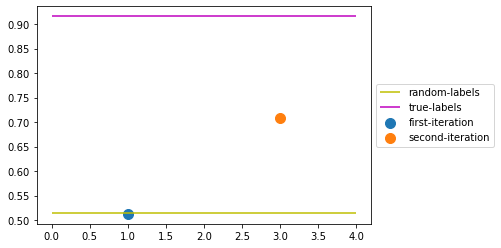

In [43]:
label_given_rules(X_train, labeling_rules_2, "second-iteration")

plot_accuracies()

### Third Iteration - Even more rules



In [44]:
from statistics import mean

print(f"NOT_SPAM comments have an average of {mean([len(t) for t in df_labeled[df_labeled.label==0].text]):.2f} characters.")
print(f"SPAM comments have an average of {mean([len(t) for t in df_labeled[df_labeled.label==1].text]):.2f} characters.")

NOT_SPAM comments have an average of 49.64 characters.
SPAM comments have an average of 137.34 characters.


It sure looks like there is a big difference in the number of characters for both types of comments.

To decide on a threshold to classify as NOT_SPAM let's plot a histogram of the number of characters for NOT_SPAM comments:

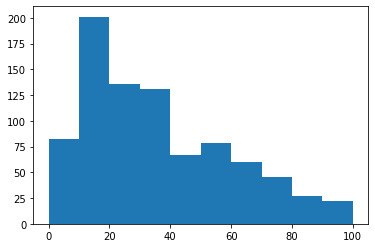

In [45]:
plt.hist([len(t) for t in df_labeled[df_labeled.label==0].text], range=(0,100))
plt.show()

In [46]:
def labeling_rules_3(x):
    
    # Convert text to lowercase
    x = x.lower()
    
    # Define list of rules to classify as NOT_SPAM
    not_spam_rules = [
        "view" in x,
        "song" in x,
        len(x) < 30
    ]
    

    # Define list of rules to classify as SPAM
    spam_rules = [
        "free" in x,
        "subs" in x,
        "gift" in x,
        "follow" in x,
        "http" in x,
        "check out" in x
    ]
    
    # Classify depending on the rules
    if any(not_spam_rules):
        return 0
    
    if any(spam_rules):
        return 1
    
    return -1

Proportion of data points kept: 78.26%

third-iteration labeling has an accuracy of 86.22%



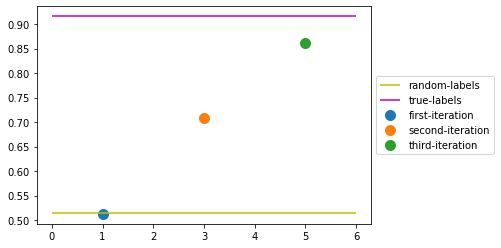

In [47]:
label_given_rules(X_train, labeling_rules_3, "third-iteration")

plot_accuracies()